In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [2]:
data_filename = 'loan_approval_dataset.csv'
data = pd.read_csv(data_filename)
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [46]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Findings
1. No need to impute data
2. Need to scale **income_annum**, **loan_amount**, **loan_term**, **cibil_score**, **residential_assets_value**, **commercial_assets_value**, **luxury_assets_value** and **bank_asset_value**
3. Remove loan_id
4. Discretise **education**, **self_employed** and **loan_status**

### Remove loan_id and Split X and y Data

In [5]:
cols = [x.strip() for x in data.columns]
data.columns = cols
X_cols = [x for x in cols if x not in {'loan_status', 'loan_id'}]
X_data = data[X_cols]
y_data = data['loan_status']
X_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


### Encode the Discrete Data

In [7]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_data[['education', 'self_employed']])
data_encoded_cols = pd.DataFrame(
    encoder.transform(X_data[['education', 'self_employed']]).toarray(), 
    columns=encoder.get_feature_names_out())
X_data_encoded = X_data.drop(['education', 'self_employed'], axis=1)
X_data_encoded = pd.concat([X_data_encoded, data_encoded_cols], axis=1)
X_data_encoded.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0,0.0,1.0,0.0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0,1.0,0.0,1.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0,0.0,1.0,0.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0,0.0,1.0,0.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0,1.0,0.0,1.0


In [19]:
ordinal_encoder = OrdinalEncoder()
y_data_encoded = ordinal_encoder.fit_transform(y_data.values.reshape(-1, 1))
y_data_encoded = y_data_encoded.flatten()
y_data_encoded

array([0., 1., 1., ..., 1., 0., 0.])

### Bucketise the Annual Income

/tmp/ipykernel_5478/2813039194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['income_annum_cat'] = income_annum_cat


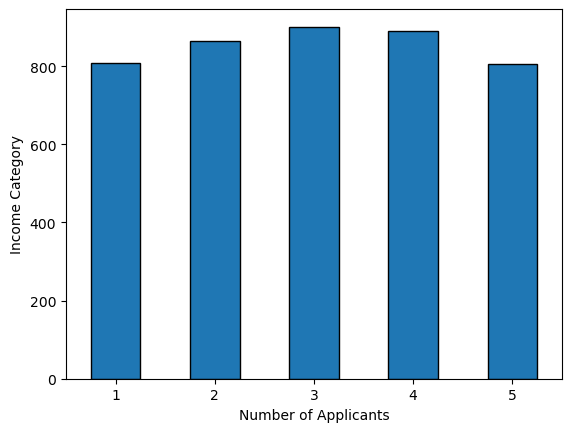

In [45]:
income_annum_cat = pd.cut(
    X_data['income_annum'], 
    bins=[0., 2_000_000, 4_000_000, 6_000_000, 8_000_000, np.inf],
    labels=[1, 2, 3, 4, 5])

X_data['income_annum_cat'] = income_annum_cat
X_data['income_annum_cat'].value_counts().sort_index().plot(kind='bar', edgecolor='black', rot=0)
plt.xlabel('Number of Applicants')
plt.ylabel('Income Category')
plt.show()

### Scale the Continuous Data

In [79]:
standard_scaler = StandardScaler()
X_data_num_scaled = pd.DataFrame(standard_scaler.fit_transform(X_data_num), columns=X_data_num.columns)
X_data_encoded[X_data_num_scaled.columns] = X_data_num_scaled
X_data_encoded.shape

/tmp/ipykernel_5478/4011639473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data[X_data_num.columns] = X_data_num_scaled[X_data_num.columns]


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum_cat
0,-0.294102,Graduate,No,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,5
1,-1.473548,Not Graduate,Yes,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,3
2,0.295621,Graduate,No,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,5
3,0.295621,Graduate,No,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,5
4,1.475067,Not Graduate,Yes,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,Graduate,Yes,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1
4265,-1.473548,Not Graduate,Yes,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,2
4266,-0.294102,Not Graduate,No,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,4
4267,-0.883825,Not Graduate,No,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,3


### Trying Various Models

In [113]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data_encoded, y_data_encoded, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=42)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

### Decision Tree

In [141]:
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train_full, y_train_full)
accuracy_score(decision_tree_clf.predict(X_test), y_test)

0.9779985805535841

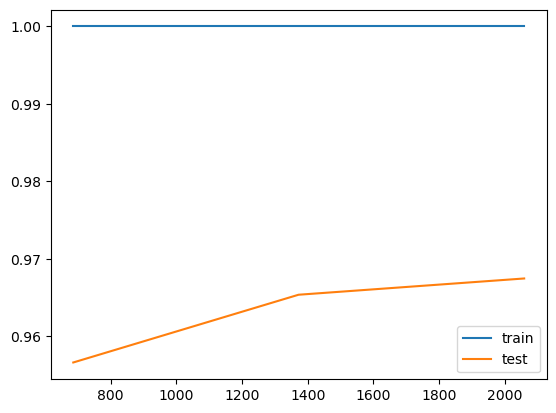

In [175]:
train_size_abs, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(), X_train_full, y_train_full, train_sizes=[0.3, 0.6, 0.9])
plt.plot(train_size_abs, np.average(train_scores, axis=1), label='train')
plt.plot(train_size_abs, np.average(test_scores, axis=1), label='test')
plt.legend()
plt.show()

### Logistic Regression

In [161]:
cross_val_score(LogisticRegression(), X_data_encoded, y=y_data, cv=10, scoring='accuracy')

array([0.92740047, 0.92505855, 0.92505855, 0.92037471, 0.92974239,
       0.8969555 , 0.92505855, 0.91569087, 0.90398126, 0.90610329])

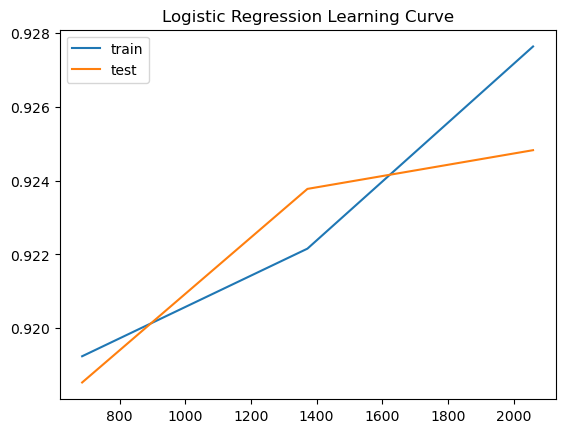

In [171]:
train_size_abs, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_train_full, y_train_full, train_sizes=[0.3, 0.6, 0.9])
plt.plot(train_size_abs, np.average(train_scores, axis=1), label='train')
plt.plot(train_size_abs, np.average(test_scores, axis=1), label='test')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()

### Shallow Neural Network

In [128]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(13, )),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="BinaryCrossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [129]:
# Assuming 'model' is your TensorFlow model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
60/60 [==============================] - 1s 9ms/step - loss: 0.7149 - accuracy: 0.5104 - val_loss: 0.6739 - val_accuracy: 0.5985
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6320 - val_loss: 0.6148 - val_accuracy: 0.6960
Epoch 3/30
60/60 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.7343 - val_loss: 0.5524 - val_accuracy: 0.7436
Epoch 4/30
60/60 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.7803 - val_loss: 0.4784 - val_accuracy: 0.8210
Epoch 5/30
60/60 [==============================] - 0s 5ms/step - loss: 0.4447 - accuracy: 0.8419 - val_loss: 0.3926 - val_accuracy: 0.8708
Epoch 6/30
60/60 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8862 - val_loss: 0.3128 - val_accuracy: 0.9047
Epoch 7/30
60/60 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9191 - val_loss: 0.2604 - val_accuracy: 0.9184
Epoch 8/30
60/60 [==

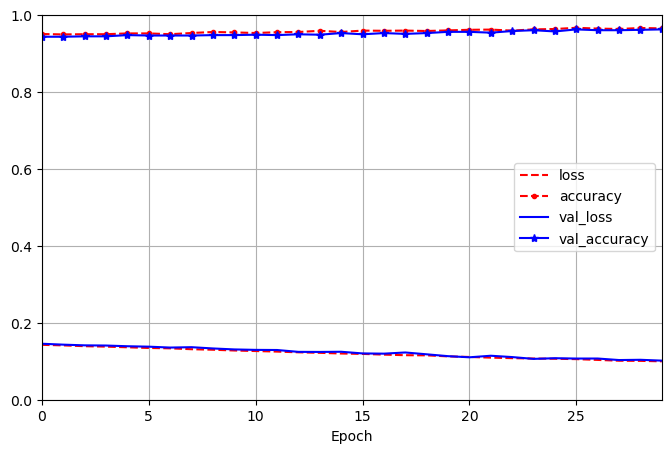

In [116]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [131]:
yhat = model.predict(X_test)
yhat

45/45 [==============================] - 0s 2ms/step


array([[0.99905926],
       [0.15019779],
       [0.9947932 ],
       ...,
       [0.01820307],
       [0.69028944],
       [0.0445138 ]], dtype=float32)

In [136]:
yhat = np.round(yhat.flatten())
yhat

array([1., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [137]:
accuracy_score(yhat, y_test)

0.9375443577004968

## Findings
- The models all have very high performance, with Decision Tree performing the best
- Logistic Regression overfits slightly, while Decision Tree slightly underfits
- The performance is great from the very start

## Investigation
Check the mutual information of the data and see why it performs so well

In [182]:
mutual_info_classif(X_data_encoded[['cibil_score']], y_data_encoded)

array([0.50351019])

## Finding
Only the **cibil_score** has a high mutual information score

## Investigation
Find the accuracy of the model if it just uses **cibil_score**

In [187]:
cross_val_score(DecisionTreeClassifier(), X_train_full[['cibil_score']], y_train_full, scoring='accuracy', cv=10)

array([0.93356643, 0.93006993, 0.96503497, 0.94405594, 0.94405594,
       0.93006993, 0.93006993, 0.94755245, 0.97552448, 0.93006993])

## Finding
- With just **cibil_score** alone, the model has an extremely high performance
- Therefore, it is the **cibil_score** that is carrying the whole model

In [189]:
cross_val_score(
    LogisticRegression(), X_train_full.drop(['cibil_score'], axis=1), y_train_full, scoring='accuracy', cv=10)

array([0.59440559, 0.63286713, 0.6013986 , 0.5979021 , 0.6048951 ,
       0.61888112, 0.61888112, 0.61188811, 0.61538462, 0.61888112])

## Investigation
What will be the learning of the model without **cibil_score**?

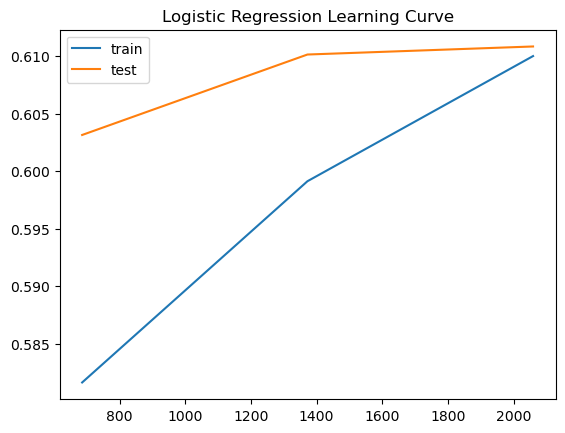

In [194]:
train_size_abs, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_train_full.drop(['cibil_score'], axis=1), y_train_full, train_sizes=[0.3, 0.6, 0.9])
plt.plot(train_size_abs, np.average(train_scores, axis=1), label='train')
plt.plot(train_size_abs, np.average(test_scores, axis=1), label='test')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()

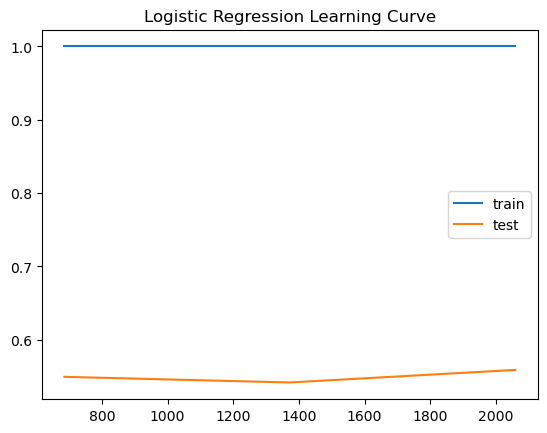

In [195]:
train_size_abs, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(), X_train_full.drop(['cibil_score'], axis=1), y_train_full, train_sizes=[0.3, 0.6, 0.9])
plt.plot(train_size_abs, np.average(train_scores, axis=1), label='train')
plt.plot(train_size_abs, np.average(test_scores, axis=1), label='test')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()

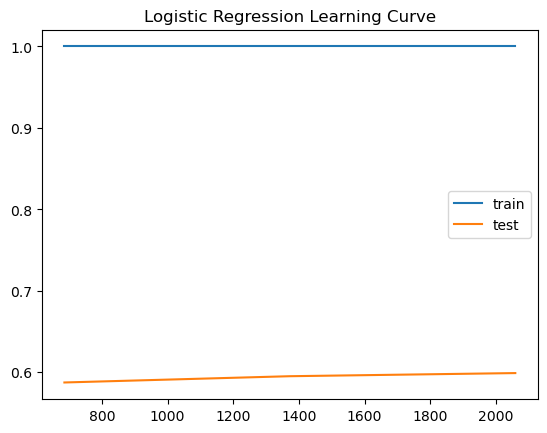

In [197]:
train_size_abs, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), X_train_full.drop(['cibil_score'], axis=1), y_train_full, train_sizes=[0.3, 0.6, 0.9])
plt.plot(train_size_abs, np.average(train_scores, axis=1), label='train')
plt.plot(train_size_abs, np.average(test_scores, axis=1), label='test')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()

## Finding
The logistic regression model converges to a very low value, meaning this model has high bias. The decision tree is very far from converging, meaning that it is high in variance. Random Forest also doesn't help